Box and whisker plot
A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be "outliers".


In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
#import missingno as msno

import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
airbnb_data = pd.read_csv('/Users/fathi/Downloads/London_Airbnb_Listings_March_2023.csv.zip')

In [5]:
airbnb_data.head()

,name,host_name,latitude,longitude,host_since,host_location,host_acceptance_rate,property_type,room_type,price,minimum_nights,maximum_nights,availability_30,availability_365,number_of_reviews,review_scores_rating
0,Lovely private bedroom in Muswell Hill.,Forough,51.597280,-0.139330,2015-07-20,"London, United Kingdom",NaN,Private room in condo,Private room,$100.00,1,365,30,365,0,NaN
1,Studio Flat Franklin London,Hussein,51.636518,-0.177475,2023-01-14,"London, United Kingdom",100%,Entire rental unit,Entire home/apt,$65.00,180,365,30,365,0,NaN
2,PropertyPlug - 2Bed Flat in Edgware SmartTV WiFi,Paul,51.608180,-0.277400,2020-01-08,NaN,91%,Entire rental unit,Entire home/apt,$132.00,2,28,12,35,0,NaN
3,Wimbledon Double Bedroom Ensuite,Nikki,51.422310,-0.188410,2010-08-01,"London, United Kingdom",100%,Private room in rental unit,Private room,$100.00,5,1125,30,365,4,3.67
4,Stunning Apartment 2 minutes walk to Tube Station,Joseph,51.602282,-0.193606,2014-12-22,NaN,46%,Entire condo,Entire home/apt,$120.00,5,90,23,337,0,NaN


Data Cleaning

In [7]:
print(airbnb_data.duplicated().sum())

3


In [9]:
airbnb_data.drop_duplicates(inplace= True)

In [11]:
airbnb_data.columns[airbnb_data.isnull().any()]

Index(['name', 'host_name', 'host_since', 'host_location',
       'host_acceptance_rate', 'review_scores_rating'],
      dtype='object')

In [12]:
airbnb_data['host_name'].isna().sum()

6

In [13]:
missing_values=airbnb_data.isnull().sum()
print(missing_values)

name                       31
host_name                   6
latitude                    0
longitude                   0
host_since                  5
host_location           15305
host_acceptance_rate    24213
property_type               0
room_type                   0
price                       0
minimum_nights              0
maximum_nights              0
availability_30             0
availability_365            0
number_of_reviews           0
review_scores_rating    18690
dtype: int64


In [17]:
airbnb_data['name'].fillna('One Bedroom',inplace= True)

In [18]:
airbnb_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75238 entries, 0 to 75240
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  75238 non-null  object 
 1   host_name             75232 non-null  object 
 2   latitude              75238 non-null  float64
 3   longitude             75238 non-null  float64
 4   host_since            75233 non-null  object 
 5   host_location         59933 non-null  object 
 6   host_acceptance_rate  51025 non-null  object 
 7   property_type         75238 non-null  object 
 8   room_type             75238 non-null  object 
 9   price                 75238 non-null  object 
 10  minimum_nights        75238 non-null  int64  
 11  maximum_nights        75238 non-null  int64  
 12  availability_30       75238 non-null  int64  
 13  availability_365      75238 non-null  int64  
 14  number_of_reviews     75238 non-null  int64  
 15  review_scores_rating  56

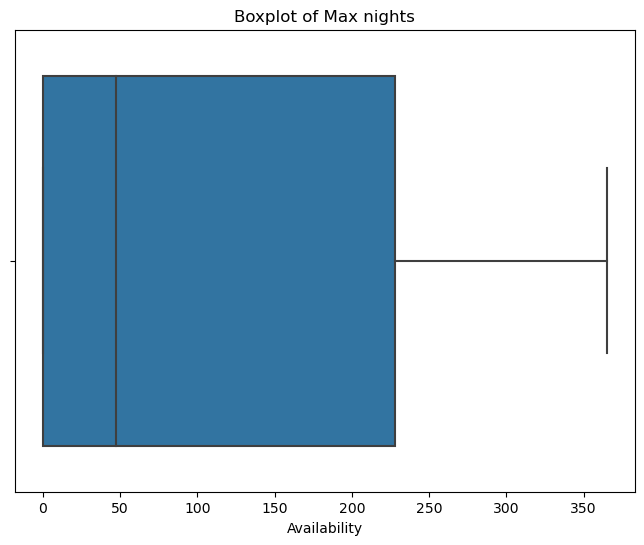

In [26]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='availability_365', data=airbnb_data)
plt.title('Boxplot of Max nights')
plt.xlabel('Availability')
plt.show()

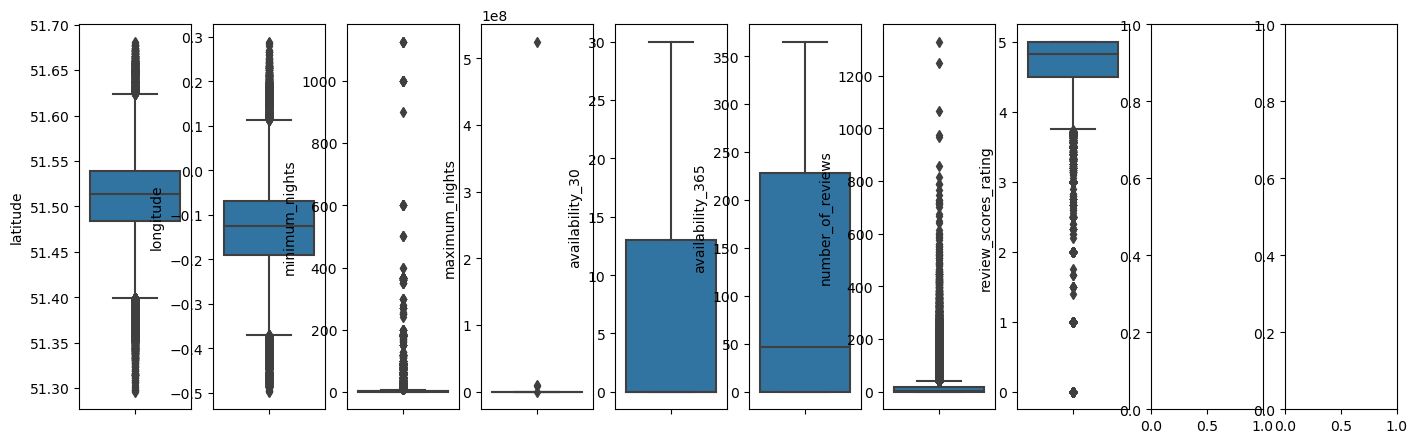

In [53]:
fig,axes = plt.subplots(1,10,figsize=(17,5))
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

i = 0
newdf = airbnb_data.select_dtypes(include=numerics)

for cat_col in newdf.columns:
    sns.boxplot(y=cat_col, data = newdf, ax=axes[i])
    i=i+1

# print(airbnb_data['availability_365'].describe())
plt.subplots_adjust(hspace=1)

In [43]:
airbnb_data.dtypes



name                     object
host_name                object
latitude                float64
longitude               float64
host_since               object
host_location            object
host_acceptance_rate     object
property_type            object
room_type                object
price                    object
minimum_nights            int64
maximum_nights            int64
availability_30           int64
availability_365          int64
number_of_reviews         int64
review_scores_rating    float64
dtype: object

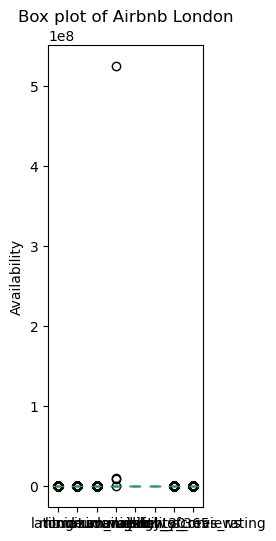

In [31]:
airbnb_data.plot(kind='box', figsize=(2, 6))

plt.title('Box plot of Airbnb London')
plt.ylabel('Availability')

plt.show()

In [34]:
airbnb_data=airbnb_data.loc[['availability_365']].transpose()

airbnb_data.head()

KeyError: "None of [Index(['availability_365'], dtype='object')] are in the [index]"